<a href="https://colab.research.google.com/github/juniorskg/football-insight/blob/main/mains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project aim to give insight about football match which will help a betting company to set PRE-MATCH ODDS. PRE-MATCH ODDS  outline a particular match outcome's theoretical likelihood. Oddsmakers will set the lines according to the implied probability of either outcome happening. bet companies need usefull insight of previous game data to set them .

the data set used can be found

In [ ]:
# importing needed libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")

In [ ]:
#importing data set and showing the
ft=pd.read_csv("past-data.csv")
ft.head(2)

C:\Users\couli\AppData\Local\Temp\ipykernel_41624\2251108080.py:2: DtypeWarning: Columns (3,12) have mixed types. Specify dtype option on import or set low_memory=False.
  ft=pd.read_csv("past-data.csv")


,Season,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,22-23,Premier League,05/08/2022,20:00,Crystal Palace,Arsenal,0.0,2.0,A,0.0,...,2.0,2.0,16.0,11.0,3.0,5.0,1.0,2.0,0.0,0.0
1,22-23,Premier League,06/08/2022,12:30,Fulham,Liverpool,2.0,2.0,D,1.0,...,3.0,4.0,7.0,9.0,4.0,4.0,2.0,0.0,0.0,0.0


take a look at the data

In [ ]:
ft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113514 entries, 0 to 113513
Data columns (total 25 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Season    113514 non-null  object 
 1   Div       113514 non-null  object 
 2   Date      113514 non-null  object 
 3   Time      15422 non-null   object 
 4   HomeTeam  113514 non-null  object 
 5   AwayTeam  113514 non-null  object 
 6   FTHG      113514 non-null  float64
 7   FTAG      113514 non-null  float64
 8   FTR       113514 non-null  object 
 9   HTHG      104796 non-null  float64
 10  HTAG      104795 non-null  float64
 11  HTR       104796 non-null  object 
 12  Referee   22862 non-null   object 
 13  HS        58408 non-null   float64
 14  AS        58408 non-null   float64
 15  HST       57490 non-null   float64
 16  AST       57490 non-null   float64
 17  HF        57270 non-null   float64
 18  AF        57270 non-null   float64
 19  HC        58033 non-null   float64
 20  AC  

the data set contain
113514 rows
25 columns
the number of non missing value and the data type for each column is shown above


In [ ]:
print(ft.isnull().sum())# identify the number of missing data per column


Season          0
Div             0
Date            0
Time        98092
HomeTeam        0
AwayTeam        0
FTHG            0
FTAG            0
FTR             0
HTHG         8718
HTAG         8719
HTR          8718
Referee     90652
HS          55106
AS          55106
HST         56024
AST         56024
HF          56244
AF          56244
HC          55481
AC          55481
HY          54929
AY          54928
HR          54928
AR          54928
dtype: int64


convert the date and time in date format

In [ ]:
ft["Date"] = pd.to_datetime(ft["Date"], format='mixed')
ft["Time"] = pd.to_datetime(ft["Time"], format='%H:%M')


ft.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113514 entries, 0 to 113513
Data columns (total 25 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Season    113514 non-null  object        
 1   Div       113514 non-null  object        
 2   Date      113514 non-null  datetime64[ns]
 3   Time      15422 non-null   datetime64[ns]
 4   HomeTeam  113514 non-null  object        
 5   AwayTeam  113514 non-null  object        
 6   FTHG      113514 non-null  float64       
 7   FTAG      113514 non-null  float64       
 8   FTR       113514 non-null  object        
 9   HTHG      104796 non-null  float64       
 10  HTAG      104795 non-null  float64       
 11  HTR       104796 non-null  object        
 12  Referee   22862 non-null   object        
 13  HS        58408 non-null   float64       
 14  AS        58408 non-null   float64       
 15  HST       57490 non-null   float64       
 16  AST       57490 non-null   float64    

extract required column to creat new dataframes for each leagues
to be able to compute the percentage of home win , away win and drawn

In [ ]:
#english away win,home win and draw  percentage
en_home_away= ft.loc[ft["Div"].isin(["Premier League","EFL Championship"]),["Div", "FTR"]]

en_home_away.info()
en_away_win=((en_home_away["FTR"]=="A").sum())/ len(en_home_away["FTR"]) *100
en_home_win=(en_home_away["FTR"]=="H").sum()/ len(en_home_away["FTR"]) *100
en_draw_win=(en_home_away["FTR"]=="D").sum()/ len(en_home_away["FTR"]) *100
print(en_away_win)
print(en_draw_win)
print(en_home_win)

<class 'pandas.core.frame.DataFrame'>
Index: 28124 entries, 0 to 28123
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Div     28124 non-null  object
 1   FTR     28124 non-null  object
dtypes: object(2)
memory usage: 659.2+ KB
28.193002417863745
26.78139667188167
45.02560091025459


In [ ]:
#germany away win,home win and draw  percentage
de_home_away= ft.loc[ft["Div"].isin(["Bundesliga","Bundesliga 2"]),["Div", "FTR"]]
de_home_away.info()
de_away_win=((de_home_away["FTR"]=="A").sum())/ len(de_home_away["FTR"])*100
de_home_win=(de_home_away["FTR"]=="H").sum()/ len(de_home_away["FTR"])*100
de_draw_win=(de_home_away["FTR"]=="D").sum()/len(de_home_away["FTR"])*100
print(de_away_win)
print(de_draw_win)
print(de_home_win)

<class 'pandas.core.frame.DataFrame'>
Index: 18434 entries, 28124 to 46557
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Div     18434 non-null  object
 1   FTR     18434 non-null  object
dtypes: object(2)
memory usage: 432.0+ KB
27.264836714766194
26.657263751763043
46.07789953347076


In [ ]:
#italy away win,home win and draw  percentage
it_home_away= ft.loc[ft["Div"].isin(["Serie A","Serie B"]),["Div", "FTR"]]
it_home_away.info()
it_away_win=((it_home_away["FTR"]=="A").sum())/ len(it_home_away["FTR"])*100
it_home_win=(it_home_away["FTR"]=="H").sum()/ len(it_home_away["FTR"])*100
it_draw_win=(it_home_away["FTR"]=="D").sum()/len(it_home_away["FTR"])*100
print(it_away_win)
print(it_draw_win)
print(it_home_win)

<class 'pandas.core.frame.DataFrame'>
Index: 21748 entries, 46558 to 68305
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Div     21748 non-null  object
 1   FTR     21748 non-null  object
dtypes: object(2)
memory usage: 509.7+ KB
24.986205628103733
29.91539451903623
45.098399852860034


In [ ]:
#france away win,home win and draw  percentage
fr_home_away= ft.loc[ft["Div"].isin(["Ligue 1","Ligue 2"]),["Div", "FTR"]]
fr_home_away.info()
fr_away_win=((fr_home_away["FTR"]=="A").sum())/ len(fr_home_away["FTR"])*100
fr_home_win=(fr_home_away["FTR"]=="H").sum()/ len(fr_home_away["FTR"])*100
fr_draw_win=(fr_home_away["FTR"]=="D").sum()/len(fr_home_away["FTR"])*100
print(fr_away_win)
print(fr_draw_win)
print(fr_home_win)

<class 'pandas.core.frame.DataFrame'>
Index: 21252 entries, 68306 to 89557
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Div     21252 non-null  object
 1   FTR     21252 non-null  object
dtypes: object(2)
memory usage: 498.1+ KB
24.66120835686053
29.719555806512325
45.61923583662714


In [ ]:
#spain away win,home win and draw  percentage
sp_home_away= ft.loc[ft["Div"].isin(["LaLiga","LaLiga 2"]),["Div", "FTR"]]
sp_home_away.info()
sp_away_win=((sp_home_away["FTR"]=="A").sum())/len(sp_home_away["FTR"])*100
sp_home_win=(sp_home_away["FTR"]=="H").sum()/len(sp_home_away["FTR"])*100
sp_draw_win=(sp_home_away["FTR"]=="D").sum()/len(sp_home_away["FTR"])*100
print(sp_away_win)
print(sp_draw_win)
print(sp_home_win)

<class 'pandas.core.frame.DataFrame'>
Index: 23956 entries, 89558 to 113513
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Div     23956 non-null  object
 1   FTR     23956 non-null  object
dtypes: object(2)
memory usage: 561.5+ KB
26.03105693771915
28.109868091501085
45.85907497077976


plot graph for Home win vs away win vs draw per countries

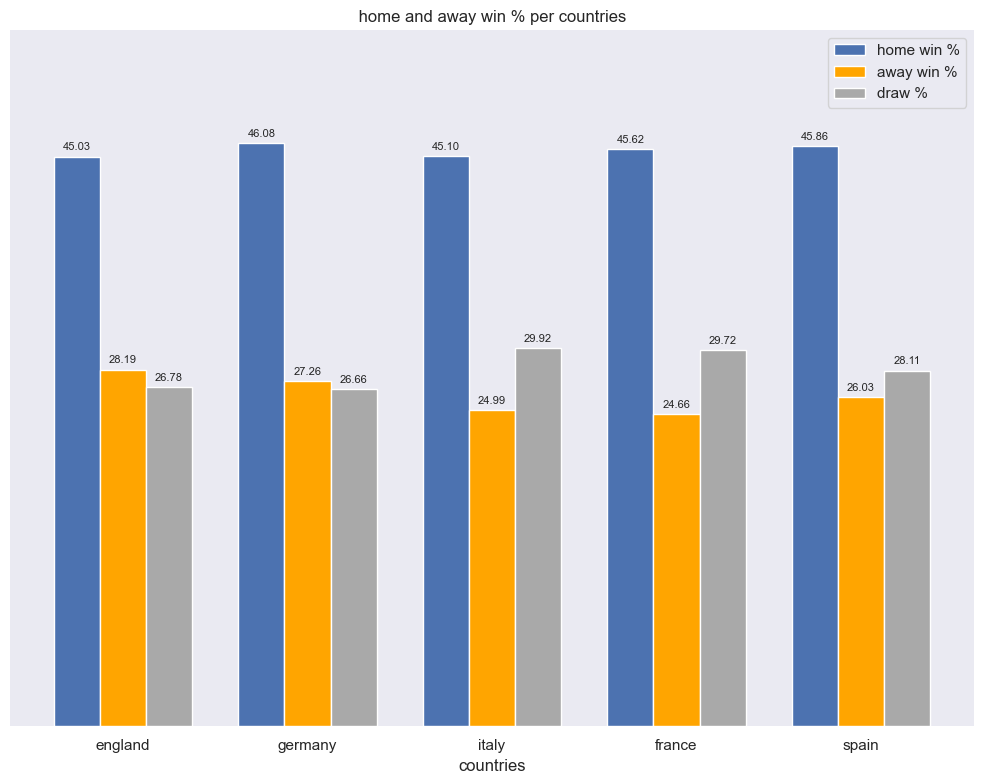

In [ ]:


countries=["england","germany","italy","france","spain"]
away_win=[en_away_win,de_away_win,it_away_win,fr_away_win,sp_away_win]
draw=[en_draw_win,de_draw_win,it_draw_win,fr_draw_win,sp_draw_win]
home_win=[en_home_win,de_home_win,it_home_win,fr_home_win,sp_home_win]

bar_width=0.25
index = np.arange(len(countries))
plt.figure(figsize=(10, 8),facecolor="w")
a=plt.bar(index, home_win,bar_width, label="home win %")
b=plt.bar( index + bar_width, away_win,bar_width, label="away win %",color="orange")
c=plt.bar(index + 2 * bar_width, draw, bar_width, label="draw %",color="darkgray")
plt.xlabel("countries")
#plt.ylabel("percentage")
plt.yticks([])
plt.title(" home and away win % per countries ")
plt.legend()
plt.xticks(index + bar_width, countries)
plt.ylim(0, 55)
#remove the axis line
mpl.rcParams["axes.spines.left"] = False
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False
mpl.rcParams["axes.spines.bottom"] = False
#put the number in front of the lines
plt.bar_label(a, fmt="%.2f", padding=3,size=8)
plt.bar_label(b, fmt="%.2f", padding=3,size=8)
plt.bar_label(c, fmt="%.2f", padding=3,size=8)
plt.gcf().set_facecolor('white')# make the back ground white
plt.grid(False) # remove the grid



the above graph compare the percentage of home win ,the percentage of away win and the percentage of drawing in the 5 countries. help to show home-field advantage in the 5 countries and its impact on match outcomes. we observe that teams playing at home have a higher chance of winning games for example in england a team playing at home have a 45.03% chance to win and a 26.19% chance to lose

Home shot vs away shot  per countries

In [ ]:
print(ft.isnull().sum())# identify the number of missing data per column

Season          0
Div             0
Date            0
Time        98092
HomeTeam        0
AwayTeam        0
FTHG            0
FTAG            0
FTR             0
HTHG         8718
HTAG         8719
HTR          8718
Referee     90652
HS          55106
AS          55106
HST         56024
AST         56024
HF          56244
AF          56244
HC          55481
AC          55481
HY          54929
AY          54928
HR          54928
AR          54928
dtype: int64


extract required column to creat new dataframes

In [ ]:
#english home vs away  shot analysis
en_ha_shot= ft.loc[ft["Div"].isin(["Premier League","EFL Championship"]),["Div", "AS","HS"]]
print(en_ha_shot.isnull().sum())# identify the number of missing data per column
en_ha_shot= en_ha_shot.dropna()# remove the missing
en_ha_shot.info()
en_home_shot= (en_ha_shot["HS"].sum())/len(en_ha_shot["AS"])


en_away_shot=(en_ha_shot["AS"].sum())/len(en_ha_shot["AS"])


print(en_home_shot)
print(en_away_shot)




Div       0
AS     6689
HS     6689
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 21435 entries, 0 to 21435
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Div     21435 non-null  object 
 1   AS      21435 non-null  float64
 2   HS      21435 non-null  float64
dtypes: float64(2), object(1)
memory usage: 669.8+ KB
13.102635875903896
10.45952880802426


In [ ]:
#germany home vs away  shot analysis
de_ha_shot= ft.loc[ft["Div"].isin(["Bundesliga","Bundesliga 2"]),["Div", "AS","HS"]]
print(de_ha_shot.isnull().sum())# identify the number of missing data per column
de_ha_shot= de_ha_shot.dropna()# remove the missing
de_ha_shot.info()


de_home_shot= (de_ha_shot["HS"].sum())/ len(de_ha_shot["AS"])


de_away_shot=de_ha_shot["AS"].sum()/ len(de_ha_shot["AS"])

print(de_home_shot)
print(de_away_shot)



Div       0
AS     9113
HS     9113
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 9321 entries, 28124 to 42199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Div     9321 non-null   object 
 1   AS      9321 non-null   float64
 2   HS      9321 non-null   float64
dtypes: float64(2), object(1)
memory usage: 291.3+ KB
14.432357043235704
11.675678575260164


In [ ]:
#italy home vs away  shot analysis
it_ha_shot= ft.loc[ft["Div"].isin(["Serie A","Serie B"]),["Div", "AS","HS"]]
print(it_ha_shot.isnull().sum())# identify the number of missing data per column
it_ha_shot= it_ha_shot.dropna()# remove the missing
it_ha_shot.info()

it_home_shot= it_ha_shot["HS"].sum()/len(it_ha_shot["AS"])


it_away_shot=it_ha_shot["AS"].sum()/len(it_ha_shot["AS"])


print(it_home_shot)
print(it_away_shot)



Div        0
AS     12601
HS     12601
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 9147 entries, 46558 to 60803
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Div     9147 non-null   object 
 1   AS      9147 non-null   float64
 2   HS      9147 non-null   float64
dtypes: float64(2), object(1)
memory usage: 285.8+ KB
13.498414780802449
11.22859954083306


In [ ]:
#france home vs away  shot analysis
fr_ha_shot= ft.loc[ft["Div"].isin(["Ligue 1","Ligue 2"]),["Div", "AS","HS"]]
print(fr_ha_shot.isnull().sum())# identify the number of missing data per column
fr_ha_shot= fr_ha_shot.dropna()# remove the missing
fr_ha_shot.info()

fr_home_shot= (fr_ha_shot["HS"].sum())/len(fr_ha_shot["AS"])


fr_away_shot=(fr_ha_shot["AS"].sum())/len(fr_ha_shot["AS"])


print(fr_home_shot)
print(fr_away_shot)


Div        0
AS     12338
HS     12338
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 8914 entries, 68306 to 81403
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Div     8914 non-null   object 
 1   AS      8914 non-null   float64
 2   HS      8914 non-null   float64
dtypes: float64(2), object(1)
memory usage: 278.6+ KB
12.780906439308952
10.371101637873009


In [ ]:
#spain home vs away  shot analysis
sp_ha_shot= ft.loc[ft["Div"].isin(["LaLiga","LaLiga 2"]),["Div", "AS","HS"]]
print(sp_ha_shot.isnull().sum())# identify the number of missing data per column
sp_ha_shot= sp_ha_shot.dropna()# remove the missing
sp_ha_shot.info()

sp_home_shot= (sp_ha_shot["HS"].sum())/len(sp_ha_shot["AS"])


sp_away_shot=(sp_ha_shot["AS"].sum())/len(sp_ha_shot["AS"])

print(sp_home_shot)
print(sp_away_shot)


Div        0
AS     14365
HS     14365
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 9591 entries, 89558 to 104251
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Div     9591 non-null   object 
 1   AS      9591 non-null   float64
 2   HS      9591 non-null   float64
dtypes: float64(2), object(1)
memory usage: 299.7+ KB
13.276717756229798
10.601188614325931


away vs home average number of shot graph plotting

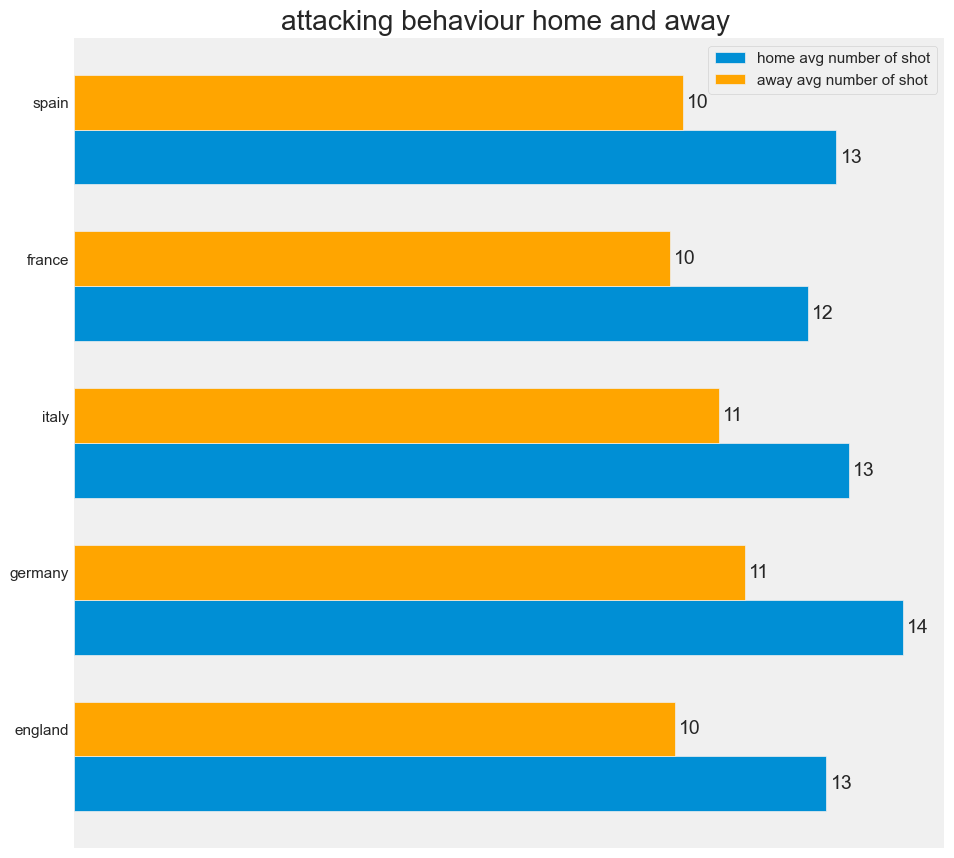

In [ ]:
countries=["england","germany","italy","france","spain"]
away_shot=[en_away_shot,de_away_shot,it_away_shot,fr_away_shot,sp_away_shot]

home_short=[en_home_shot,de_home_shot,it_home_shot,fr_home_shot,sp_home_shot]


bar_width=0.35
index = np.arange(len(countries))
plt.figure(figsize=(10, 10))
h_bar=plt.barh(index,home_short,bar_width, label="home avg number of shot")


a_bar=plt.barh( index +bar_width, away_shot,bar_width, label="away avg number of shot",color="orange")

#plt.ylabel("countries")
#plt.xlabel("ratio")
plt.title("attacking behaviour home and away ")
plt.legend(loc="upper right")

plt.yticks(index + bar_width, countries)
#plt.axis("off")

mpl.rcParams["axes.spines.left"] = False
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False
mpl.rcParams["axes.spines.bottom"] = False
plt.xticks([])
plt.grid(False)
plt.bar_label(h_bar, fmt="%d", padding=3)
plt.bar_label(a_bar, fmt="%d", padding=3)
plt.gcf().set_facecolor('white')# make the back ground white



this graph show the average number of shot per game made by teams playing at home and for teams playing away.
it help to know the attacking behaviour of teams when playing home and away . we can observe that teams tend to attack more when playing home  for examplein germany the average number of shot of home teams is 14 but that of away teams is 11

indentify if the more offensive a team is  the more goals they will score? correlation of shot with goals


In [ ]:
print(ft.isnull().sum())# identify the number of missing data per column


Season          0
Div             0
Date            0
Time        98092
HomeTeam        0
AwayTeam        0
FTHG            0
FTAG            0
FTR             0
HTHG         8718
HTAG         8719
HTR          8718
Referee     90652
HS          55106
AS          55106
HST         56024
AST         56024
HF          56244
AF          56244
HC          55481
AC          55481
HY          54929
AY          54928
HR          54928
AR          54928
dtype: int64


extract required column to creat new dataframes

In [ ]:



# shot and goal analysis

sg= ft[["Div", "AS","HS","FTHG","FTAG"]]
print(sg.isnull().sum())# identify the number of missing data per column
sg= sg.dropna()# remove the missing
sg.info()
sg["TG"]=sg["FTHG"]+sg["FTAG"]
sg["TS"]=sg["HS"]+sg["AS"]
sg.tail(3)





Div         0
AS      55106
HS      55106
FTHG        0
FTAG        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 58408 entries, 0 to 104251
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Div     58408 non-null  object 
 1   AS      58408 non-null  float64
 2   HS      58408 non-null  float64
 3   FTHG    58408 non-null  float64
 4   FTAG    58408 non-null  float64
dtypes: float64(4), object(1)
memory usage: 2.7+ MB


,Div,AS,HS,FTHG,FTAG,TG,TS
104249,LaLiga,13.0,17.0,2.0,1.0,3.0,30.0
104250,LaLiga,18.0,20.0,4.0,3.0,7.0,38.0
104251,LaLiga,13.0,15.0,3.0,1.0,4.0,28.0


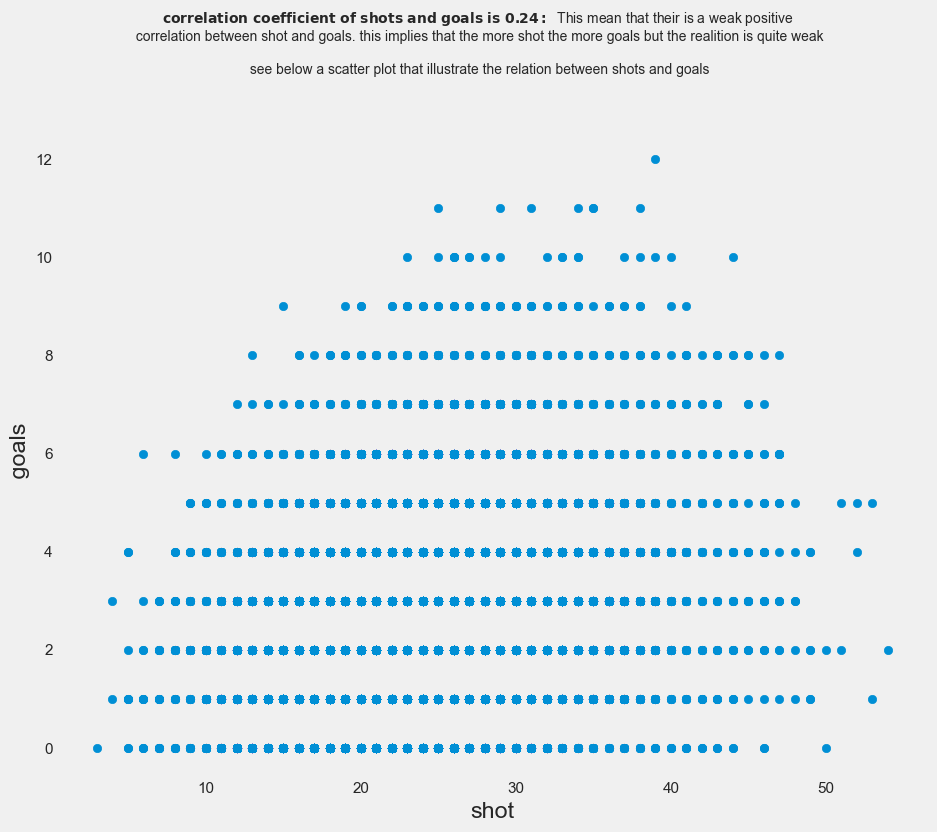

In [ ]:
# plot the scatter plot
plt.figure(figsize=(10,8))
plt.scatter(sg["TS"],sg["TG"])
plt.xlabel("shot")
plt.ylabel(" goals")
#plt.title("relationship of shot and goal")




plt.grid(False)
mpl.rcParams["axes.spines.left"] = True
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False
mpl.rcParams["axes.spines.bottom"] = True

# add a text at the top of the graph
corr_coefficient = np.corrcoef(sg["TS"], sg["TG"])[0, 1]
corr_coefficient= format(corr_coefficient,".2g")
text = rf"""$\bf{{correlation \ coefficient \ of \ shots \ and \ goals \ is \ {corr_coefficient} : }}$  This mean that their is a weak positive
 correlation between shot and goals. this implies that the more shot the more goals but the realition is quite weak

 see below a scatter plot that illustrate the relation between shots and goals"""

plt.figtext(0.5, 0.95, text, fontsize=10, ha='center')


plt.show()


extract required column to creat new dataframes

In [ ]:

r_yr=  ft[["Div", "AY","HY","AR","HR","Referee"]]
r_yr=r_yr.dropna()
r_yr["TY"]=r_yr["HY"]+r_yr["AY"]
r_yr["TR"]=r_yr["HR"]+r_yr["AR"]
print(r_yr.isnull().sum())

r_yr.head(3)



Div        0
AY         0
HY         0
AR         0
HR         0
Referee    0
TY         0
TR         0
dtype: int64


,Div,AY,HY,AR,HR,Referee,TY,TR
0,Premier League,2.0,1.0,0.0,0.0,A Taylor,3.0,0.0
1,Premier League,0.0,2.0,0.0,0.0,A Madley,2.0,0.0
2,Premier League,3.0,3.0,0.0,0.0,P Bankes,6.0,0.0


game metrics analysis

C:\Users\couli\AppData\Local\Temp\ipykernel_41624\1629183898.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  performance_data["TST"]=ft["AST"]+ft["HST"]
C:\Users\couli\AppData\Local\Temp\ipykernel_41624\1629183898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  performance_data["TF"]=ft["AF"]+ft["HF"]
C:\Users\couli\AppData\Local\Temp\ipykernel_41624\1629183898.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

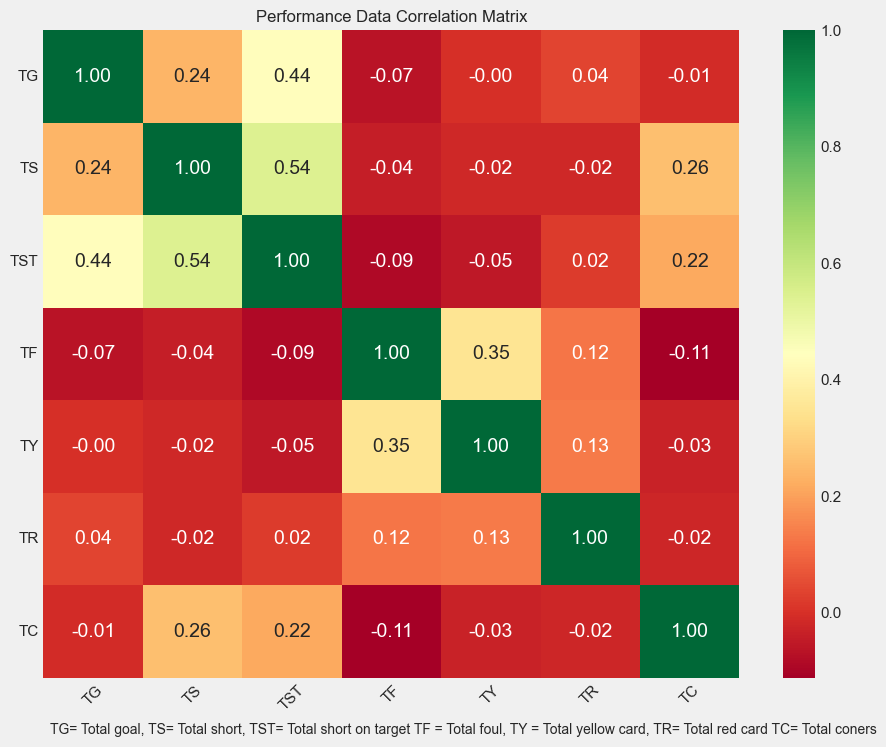

In [ ]:
# PERFOMANCE DATA FRAME CREATION
performance_data=sg[["TG","TS"]]
performance_data["TST"]=ft["AST"]+ft["HST"]
performance_data["TF"]=ft["AF"]+ft["HF"]
performance_data["TY"]=r_yr["TY"]
performance_data["TR"]=r_yr["TR"]
performance_data["TC"]=ft["AC"]+ft["HC"]
performance_data.head()

#CORRELATION MATTRIX
correlation_matrix=performance_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn", fmt=".2f", linewidths=0)
sns. set(font_scale=1)
plt.title( "Performance Data Correlation Matrix")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
# put a text below the graph to give the fullform of the metrics
text = "TG= Total goal, TS= Total short, TST= Total short on target TF = Total foul, TY = Total yellow card, TR= Total red card TC= Total coners"

plt.figtext(0.5, 0, text, fontsize=10, ha='center')
plt.show()

this graph show the correlation between perfomance metrics. it shows use how change in one perfomance metrics may affect and to what extend it will affect  other  metrics.   for example increse in TST is trongly likely to generate an increase in TG

scheduel on performance

In [ ]:
performance_data.head(5)

,TG,TS,TST,TF,TY,TR,TC
0,2.0,20.0,4.0,27.0,3.0,0.0,8.0
1,4.0,20.0,7.0,16.0,2.0,0.0,8.0
2,2.0,22.0,5.0,34.0,6.0,0.0,10.0
3,3.0,27.0,10.0,22.0,2.0,0.0,10.0
4,2.0,28.0,10.0,23.0,3.0,0.0,12.0


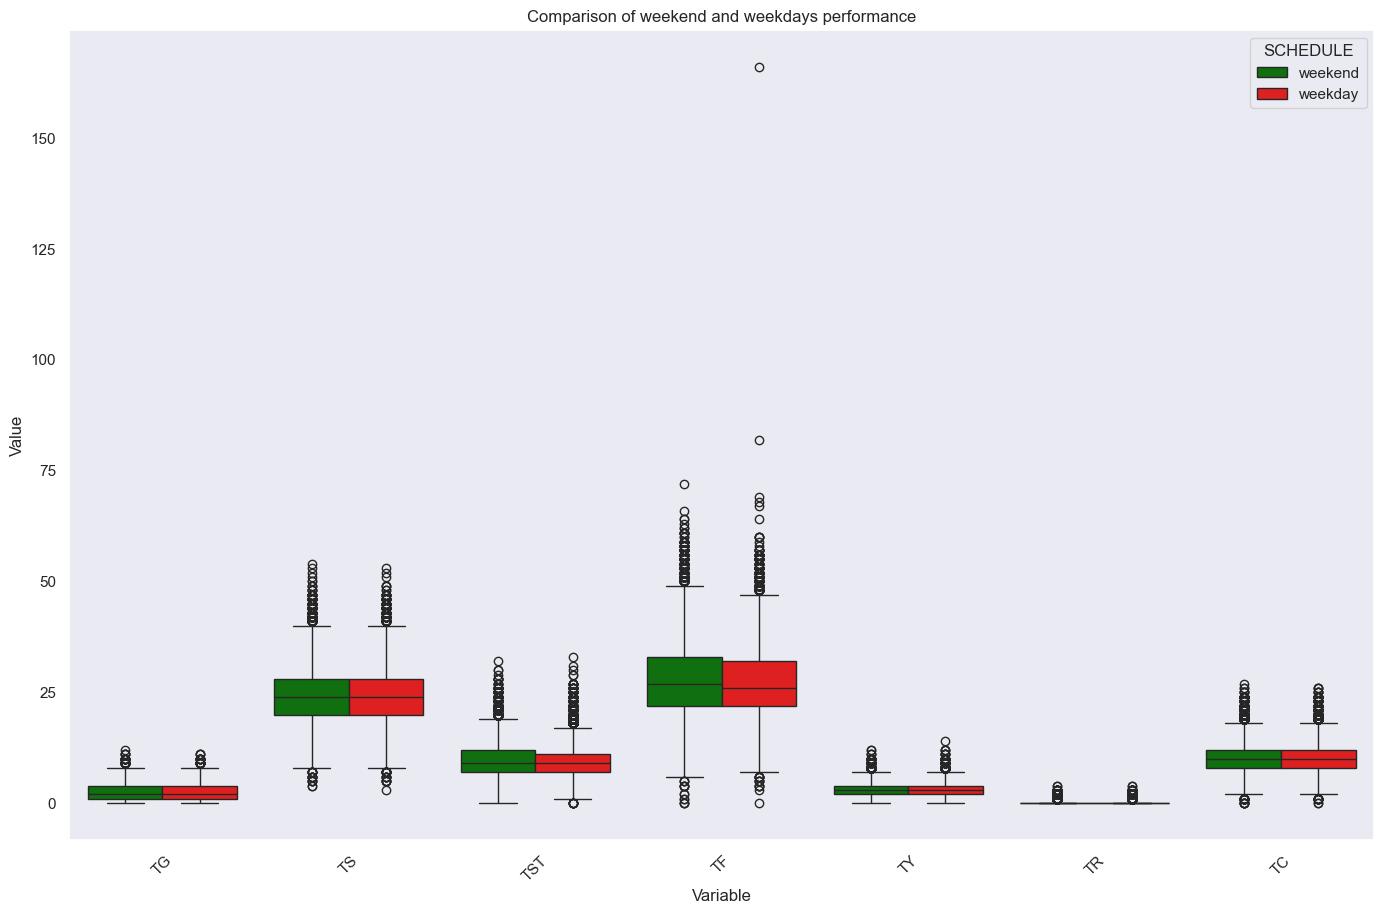

In [ ]:
#add acolumn that determine if the match is in weekday or weekend
performance_data["SCHEDULE"]= ft["Date"].apply(lambda x: "weekend" if x.weekday()>4 else ("weekday"))
#plot a box plot
performance_data_melt= performance_data.melt(id_vars="SCHEDULE", var_name="Variable", value_name="Value")

plt.figure(figsize=(15, 10))
sns.boxplot(x="Variable", y="Value", hue="SCHEDULE", data=performance_data_melt,
            palette={"weekend": "green", "weekday": "red"})

plt.title("Comparison of weekend and weekdays performance")
plt.xlabel("Variable")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.grid(False)
plt.gcf().set_facecolor('white')# make the back ground white
plt.show()




this graph show the box plot comparision of performance metrics for teams playing in weekdays and team playing in weekends , this illustrate how the schedule affect team performence.

In [ ]:
performance_data["date"]=ft["Date"]

time_series_plot=performance_data[["date","TG","TS", "TST","TF","TY","TR","TC"]]


time_series_plot.set_index("date", inplace=True)
# creat a new dataframe which contain the sum the metric per year
annual_sum = time_series_plot.resample('Y').sum()


print(annual_sum)


                 TG       TS      TST        TF      TY     TR       TC
date                                                                   
2000-12-31   1820.0  15400.0   7263.0   18453.0  2214.0  116.0   7511.0
2001-12-31   4204.0  34756.0  16114.0   45367.0  5423.0  345.0  16694.0
2002-12-31   3332.0  26856.0  13096.0   33524.0  4058.0  262.0  13484.0
2003-12-31   2884.0  24536.0  10885.0   29277.0  2720.0  179.0  11914.0
2004-12-31   3353.0  29237.0  11197.0   36190.0  2430.0  156.0  13577.0
2005-12-31   4370.0  39278.0  14853.0   48796.0  3465.0  213.0  16480.0
2006-12-31   6323.0  57078.0  25092.0   71312.0  4551.0  313.0  23635.0
2007-12-31   6438.0  60009.0  26843.0   74750.0  3762.0  225.0  26215.0
2008-12-31   6145.0  59143.0  24168.0   73481.0  2775.0  168.0  25145.0
2009-12-31   6094.0  58933.0  24366.0   70556.0  2703.0  137.0  24845.0
2010-12-31   6251.0  59556.0  24702.0   67659.0  2825.0  161.0  25202.0
2011-12-31   6355.0  59160.0  24924.0   64304.0  2898.0  152.0  

C:\Users\couli\AppData\Local\Temp\ipykernel_41624\1113635290.py:8: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_sum = time_series_plot.resample('Y').sum()


plot a time series line

C:\Users\couli\AppData\Local\Temp\ipykernel_41624\1749628425.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(annual_sum.index[-1], annual_sum[column][-1], column, fontsize=9, verticalalignment='center')
C:\Users\couli\AppData\Local\Temp\ipykernel_41624\1749628425.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(annual_sum.index[0], annual_sum[column][0], column, fontsize=9, verticalalignment='center')


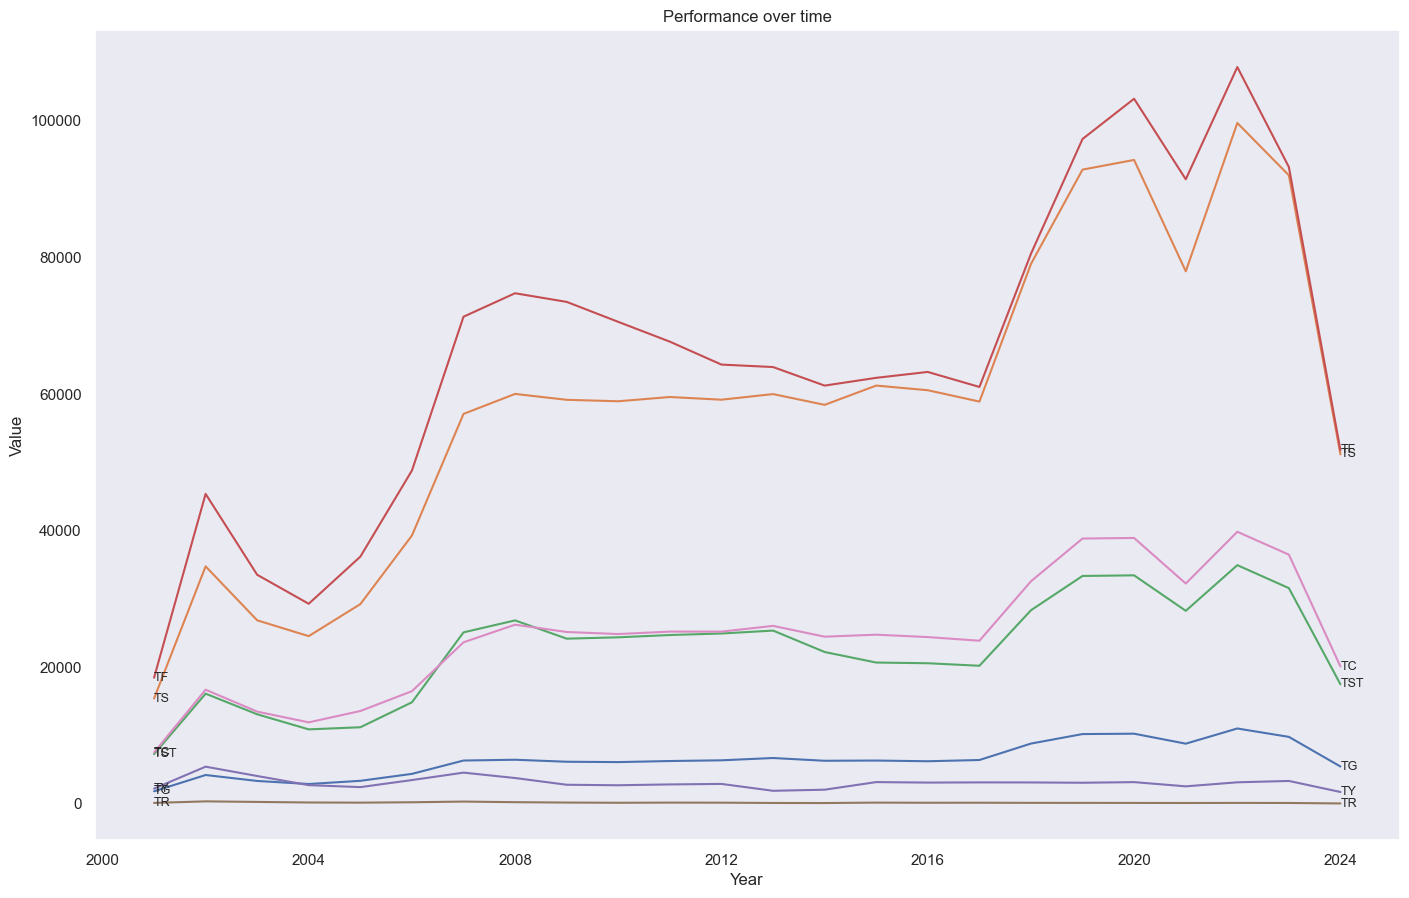

In [ ]:
plt.figure(figsize=(15, 10))
#
for column in annual_sum.columns:
    plt.plot(annual_sum.index, annual_sum[column], label=column)
#put the label of each line in front and behind the graphs because some are intercerting at the end or at the start
for column in annual_sum.columns:
    plt.text(annual_sum.index[-1], annual_sum[column][-1], column, fontsize=9, verticalalignment='center')
for column in annual_sum.columns:
    plt.text(annual_sum.index[0], annual_sum[column][0], column, fontsize=9, verticalalignment='center')

plt.title('Performance over time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.gcf().set_facecolor('white')# make the back ground white
plt.grid(False)
plt.show()

this grap is a time serie plot of performance metric over different time,  it illustrate perfomancemetric trend over the years.